In [1]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_Data_Sampled.csv')

In [4]:
df['Gender'] = df['Gender'].str.strip().str.lower().map({
    'male': 'Male',
    'female': 'Female'
})

print(df['Gender'].unique())

['Male' 'Female']


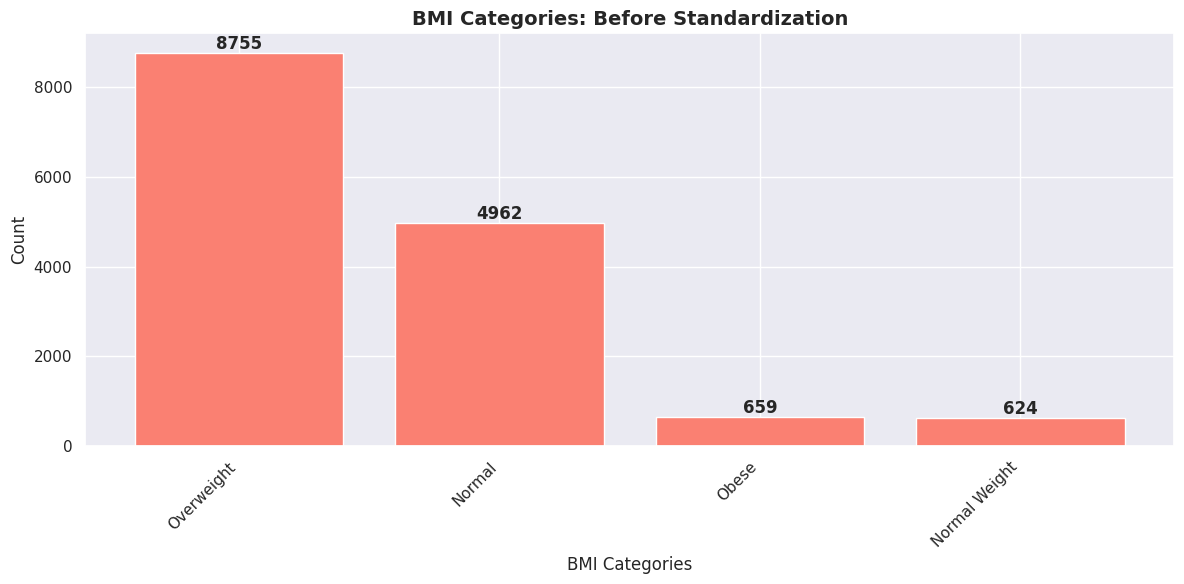

In [5]:
import matplotlib.pyplot as plt

# Plot BEFORE standardization
plt.figure(figsize=(12, 6))

# Get value counts before cleaning
bmi_before = df['BMI Category'].astype(str).str.strip().str.title()
value_counts_before = bmi_before.value_counts()

# Create bar plot
bars_before = plt.bar(value_counts_before.index, value_counts_before.values, color='salmon')
plt.title('BMI Categories: Before Standardization', fontsize=14, fontweight='bold')
plt.xlabel('BMI Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar, value in zip(bars_before, value_counts_before.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}',
             ha='center', va='bottom', fontweight='bold')

# Highlight invalid entries by drawing a red box around them (optional)
# You would need to identify which categories are invalid based on your valid list

plt.tight_layout()
plt.show()



In [6]:
# List all unique BMI categories in the dataset
unique_bmi_categories = df['BMI Category'].unique()
print("Existing BMI categories in dataset:", unique_bmi_categories)


Existing BMI categories in dataset: ['Normal Weight' 'Normal' 'Overweight' 'Obese']


In [7]:

valid_bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obese']


bmi_lower = df['BMI Category'].astype(str).str.strip().str.title()


invalid_bmi_count = (~bmi_lower.isin(valid_bmi_categories)).sum()

print(f" Number of wrong inconsistent BMI entries: {invalid_bmi_count}")


 Number of wrong inconsistent BMI entries: 624


In [8]:
# Standardize BMI categories to only 3 valid categories
valid_bmi_map = {
    'normal': 'Normal',
    'normall': 'Normal',
    'Normal Weight': 'Normal',
    'overweight': 'Overweight',
    'overwaight': 'Overweight',
    'obese': 'Obese',
    'underweight': 'Underweight'
}


df['BMI Category'] = df['BMI Category'].astype(str).str.strip().str.lower().map(valid_bmi_map)

 #check the result
print(" Standardized BMI categories:")
print(df['BMI Category'].value_counts())



 Standardized BMI categories:
BMI Category
Overweight    8755
Normal        4962
Obese          659
Name: count, dtype: int64


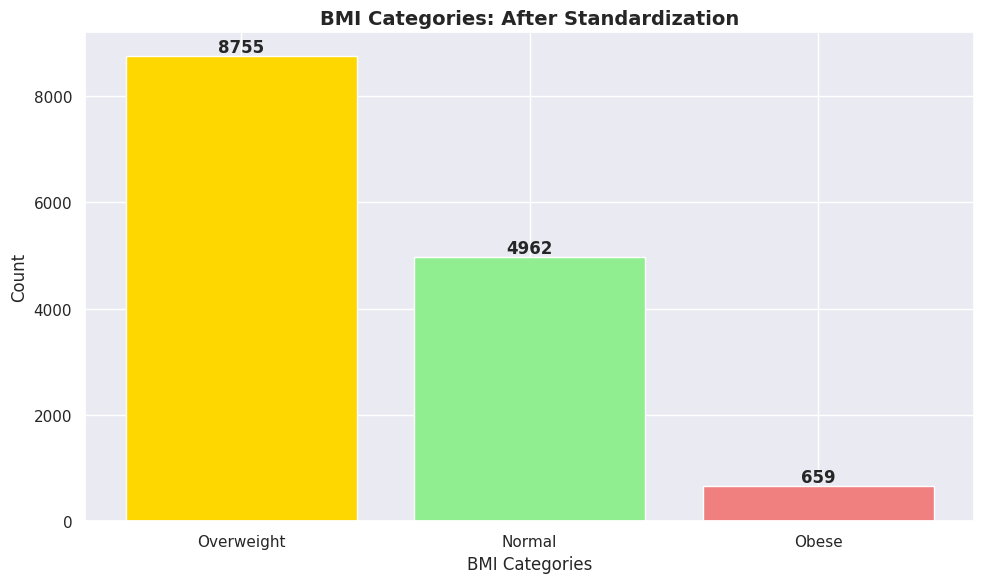

Standardized BMI categories distribution:
BMI Category
Overweight    8755
Normal        4962
Obese          659
Name: count, dtype: int64


In [9]:
# Plot AFTER standardization
plt.figure(figsize=(10, 6))

# Get value counts after cleaning
value_counts_after = df['BMI Category'].value_counts()

# Create bar plot with consistent colors for each category
colors = {'Underweight': 'lightblue', 'Normal': 'lightgreen', 'Overweight': 'gold', 'Obese': 'lightcoral'}
bar_colors = [colors.get(cat, 'gray') for cat in value_counts_after.index]

bars_after = plt.bar(value_counts_after.index, value_counts_after.values, color=bar_colors)
plt.title('BMI Categories: After Standardization', fontsize=14, fontweight='bold')
plt.xlabel('BMI Categories')
plt.ylabel('Count')

# Add value labels on top of bars
for bar, value in zip(bars_after, value_counts_after.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Standardized BMI categories distribution:")
print(value_counts_after)

created a mapping dictionary to standardize all variations to Three consistent categories:  Normal, Overweight, and Obese.

In [10]:
# List all unique Sleep Disorder in the dataset
unique_bmi_categories = df['Sleep Disorder'].unique()
print("Existing BMI categories in dataset:", unique_bmi_categories)


Existing BMI categories in dataset: ['Healthy' 'Sleep Apnea' 'Insomnia']


In [11]:
# List all unique occupations in the dataset
unique_occupations = df['Occupation'].unique()
print("Unique occupations in the dataset:")
print(unique_occupations)


Unique occupations in the dataset:
['Doctor' 'Teacher' 'Software Engineer' 'Lawyer' 'Engineer' 'Accountant'
 'Nurse' 'Scientist' 'Manager' 'Salesperson' 'Sales Representative']


In [12]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_columns))
print("Categorical Columns:", list(categorical_columns))

Numeric Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [13]:

valid_occupations = [
    'Doctor', 'Teacher', 'Software Engineer', 'Lawyer', 'Engineer',
    'Accountant', 'Nurse', 'Scientist', 'Manager', 'Salesperson'
]


occupation_map = {occ.lower(): occ for occ in valid_occupations}


df['Occupation'] = df['Occupation'].astype(str).str.strip().str.lower().map(occupation_map)


print(df['Occupation'].head(20))
df.head(20)



0                Doctor
1               Teacher
2     Software Engineer
3                Doctor
4                Lawyer
5                Doctor
6              Engineer
7              Engineer
8                Lawyer
9              Engineer
10             Engineer
11             Engineer
12             Engineer
13           Accountant
14             Engineer
15               Doctor
16           Accountant
17               Doctor
18               Lawyer
19             Engineer
Name: Occupation, dtype: object


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,NaN,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
5,6,Male,33,Doctor,6.90,7,50,6,NaN,120/80,69,7500,Healthy
6,7,Male,44,Engineer,7.85,8,45,4,Normal,125/80,65,5000,Healthy
7,8,Male,40,Engineer,8.05,8,52,4,Normal,120/80,68,6500,Healthy
8,9,Male,36,Lawyer,6.85,7,60,6,Normal,130/85,71,6500,Healthy
9,10,Male,40,Engineer,7.15,7,58,6,NaN,130/85,70,6500,Healthy


In [14]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns:", list(numeric_columns))
print("Categorical Columns:", list(categorical_columns))

Numeric Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
